# <center>Heart Failure -  Analysis</center>

# Introduction 

## About - Dataset:
   <p style='text-align:justify;'> Cardiovascular diseases kill approximately 17 million people globally every year and they mainly exhibit as myocardial infarctions and heart failures. Heart failure (HF) occurs when the heart cannot pump enough blood to meet the needs of the body.
        In this project, we analyze a dataset containing the medical records of 299 heart failure patients collected at the Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad (Punjab - Pakistan) during the months of April - December in 2015. It consists of 105 women and 194 men with their ages range between 40 and 95 years old. All 299 patients had left ventricular systolic dysfunction and had previous heart failures. This dataset contains 13 features, which reports clinical, body and lifestyle information of a patient namely Age, Anaemia, High Blood Pressure, Creatinine Phosphokinase (CPK), Diabetes, Ejection Fraction, Sex, Platelets, Serum Creatinine, Serum Sodium, Smoking Habit etc.</p>
       
## About - Project:
   <p style='text-align:justify;'>This Exploratory Data Analysis project is a part of my EDA projects. In this project, we'll analyse the relationship between the different features of the heart failure patient included in this dataset namely the distribution of age among the patients, death rate, percentage of male and female patients, variation in the platelets amount, creatinine and sodium level in the blood. The graphical representation and visualisation of data using matplotlib and seaborn library in python helps us to easily understand a lot better about the dataset.</p>

## Dataset - Source:
The dataset is obtained from [Kaggle](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data).

Please [click here](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5) to know more about the dataset.
<p style='text-align:justify;'> The dataset consist of column names (attributes) which doesn't provide complete information regarding the data recorded, so we have to refer to the another table / websites to see the complete information regarding the attributes (column names) including measurement units and normal level, if required.</p>

<p style='text-align:justify;'> Please click the below link to view the table containing information regarding column names.</p>

[Attributes Information Table](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1) 


## Download the Dataset:
   <p style='text-align:justify;'>There are several options for getting the dataset into Jupyter:</p>
   
*  <p style='text-align:justify;'> Download the CSV manually and upload it via Jupyter's GUI</p>
    
*  <p style='text-align:justify;'> Use the urlretrieve function from the urllib.request to download CSV files from a raw URL</p>
    
*  <p style='text-align:justify;'> Use a helper library, e.g., opendatasets, which contains a collection of curated datasets and provides a helper function for direct download.</p>

<p style='text-align:justify;'>Initially, I used the opendatasets helper library to download the files from Kaggle using my username and API key. Later, I uploaded the same dataset to my Github profile, to fetch the dataset directly with just few lines of code (using urllib.request.urlretrieve function) without any username or API key, just for my convenience.</p>

In [57]:
# Import all modules needed.
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import plotly.express as px

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

sns.set_style('whitegrid')

print("All Modules Initialized 🚀")

All Modules Initialized 🚀


In [58]:
# Get the data.
from urllib.request import urlretrieve 
URL = "https://raw.githubusercontent.com/muhammadanas365/Data-Science-Projects---EDA/main/1.%20Heart%20Failure%20-%20Analysis/heart_failure_clinical_records_dataset.csv"
heart_data = pd.read_csv(URL)

In [59]:
# Print first 5 rows of data
heart_data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [60]:
# Print last 5 rows of data
heart_data.tail(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


## Some basic data cleaning and exploring via Pandas.

Some info to keep in mind.

1. **Anaemia:** 0 -> No || 1 -> Yes
2. **diabetes:** 0 -> No || 1 -> Yes
3. **high_blood_pressure:** 0 -> No || 1 -> Yes
4. **sex:** 0 -> Female || 1 -> Male
5. **smoking:** 0 -> No || 1 -> Yes
6. **DEATH_EVENT:** 0 -> No || 1 -> Yes


In [61]:
df_eda = pd.DataFrame()

df_eda["age"] = heart_data["age"]
df_eda["anaemia"] = np.where(heart_data["anaemia"] < 1, "No", "Yes")
df_eda["creatinine_phosphokinase"] = heart_data["creatinine_phosphokinase"]
df_eda["diabetes"] = np.where(heart_data["diabetes"] < 1, "No", "Yes")
df_eda["ejection_fraction"] = heart_data["ejection_fraction"]
df_eda["high_blood_pressure"] = np.where(heart_data["high_blood_pressure"] < 1, "No", "Yes")
df_eda["platelets"] = heart_data["platelets"]
df_eda["serum_creatinine"] = heart_data["serum_creatinine"]
df_eda["serum_sodium"] = heart_data["serum_sodium"]
df_eda["sex"] = np.where(heart_data["sex"] < 1, "Female", "Male")
df_eda["smoking"] = np.where(heart_data["smoking"] < 1, "No", "Yes")
df_eda["death_event"] = np.where(heart_data["DEATH_EVENT"] < 1, "No", "Yes")

df_eda.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,death_event
0,75.0,No,582,No,20,Yes,265000.00,1.9,130,Male,No,Yes
1,55.0,No,7861,No,38,No,263358.03,1.1,136,Male,No,Yes
2,65.0,No,146,No,20,No,162000.00,1.3,129,Male,Yes,Yes
3,50.0,Yes,111,No,20,No,210000.00,1.9,137,Male,No,Yes
4,65.0,Yes,160,Yes,20,No,327000.00,2.7,116,Female,No,Yes


In [62]:
# Get some info on the dataset.
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    object 
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    object 
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    object 
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    object 
 11  death_event               299 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 28.2+ KB


In [63]:
# Remove un-needed data - time column
heart_data.drop(['time'], axis = 1, inplace = True) 
print("Successfully removed **time** column from dataset 🚀")

Successfully removed **time** column from dataset 🚀


In [64]:
# Get some description of the data.
heart_data.describe()

# Data Analysed.
# 1. Age -> Total values are 299. The mean(AVERGAE) age is 60-61. The minimum age is 40 and the maximum age is 95. Total ages = 55
# 2. Sex -> We see that, most of the candiates of the data are males, up to 60% and 40% females.
# 3. Smoking -> We see that around 30% of the candiates do smoke, the rest fortunately don't - I WILL VISUALISE TO SEE THIS DATA ENTRY BETTERLY
# 4. Death? -> 30% ended up dying, the rest fortuntely survived. So this could be a possiblity that the 30% who smoked died - but to make sure of this I will make a graph in the upcomming part of the notebook!

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


In [65]:
# Shape of the Dataset
df_eda.shape # 299 Columns and 12 Rows

(299, 12)

## A bit more of the inner exploration of data, fiddiling with the different columns and finding relationships between them.

In [66]:
df_eda["sex"].value_counts()

Male      194
Female    105
Name: sex, dtype: int64

In [67]:
df_eda["high_blood_pressure"].value_counts()

No     194
Yes    105
Name: high_blood_pressure, dtype: int64

In [68]:
df_eda["diabetes"].value_counts()

No     174
Yes    125
Name: diabetes, dtype: int64

In [69]:
df_eda["smoking"].value_counts()

No     203
Yes     96
Name: smoking, dtype: int64

In [70]:
df_eda["death_event"].value_counts()

No     203
Yes     96
Name: death_event, dtype: int64

## Visualise the Data, via Seaborn and Matplotlib etc.
Let's goo 🚀

In [71]:
df_eda.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,death_event
0,75.0,No,582,No,20,Yes,265000.00,1.9,130,Male,No,Yes
1,55.0,No,7861,No,38,No,263358.03,1.1,136,Male,No,Yes
2,65.0,No,146,No,20,No,162000.00,1.3,129,Male,Yes,Yes
3,50.0,Yes,111,No,20,No,210000.00,1.9,137,Male,No,Yes
4,65.0,Yes,160,Yes,20,No,327000.00,2.7,116,Female,No,Yes


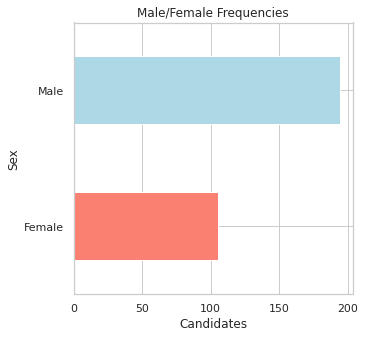

In [72]:
# 1.Showing the relationship between categoric variable "sex" and its frequency
plt.figure(figsize=(5,5))
figure_1 = df_eda["sex"].value_counts(ascending = True).plot.barh(color=["salmon", "lightblue"])
plt.title("Male/Female Frequencies")
plt.ylabel("Sex")
plt.xlabel("Candidates")
plt.show()

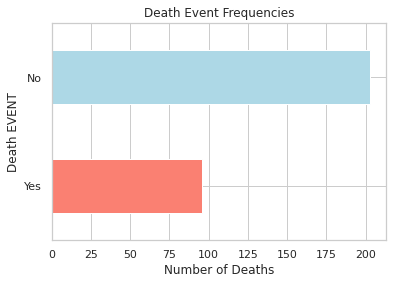

In [73]:
# 2.Showing the relationship between categoric variable "death_event" and its frequency
figure_2 = df_eda["death_event"].value_counts(ascending = True).plot.barh(color=["salmon", "lightblue"])
plt.title("Death Event Frequencies")
plt.ylabel("Death EVENT")
plt.xlabel("Number of Deaths")
plt.show()

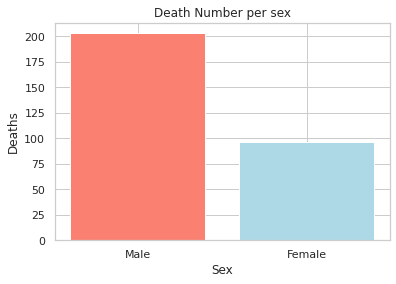

In [74]:
# 3. Death event per each sex
figure_3 = plt.bar(df_eda["sex"].value_counts().index, df_eda["death_event"].value_counts(), color=["salmon", "lightblue"])
plt.title("Death Number per sex")
plt.xlabel("Sex")
plt.ylabel("Deaths")
plt.show()

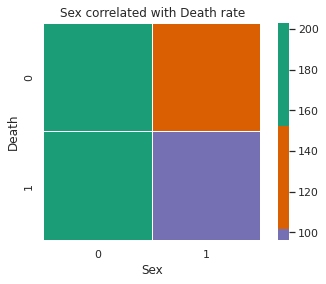

In [75]:
# 4. Sex correlated with Death rate
plt.title("Sex correlated with Death rate")
sns.heatmap((heart_data["sex"].value_counts(), heart_data["DEATH_EVENT"].value_counts()), cmap='Dark2_r',linewidth=.5,square=True, center=0)
plt.xlabel("Sex") # MALE - 1 || FEMALE - 0
plt.ylabel("Death") # YES - 1 || NO - 0
plt.show()

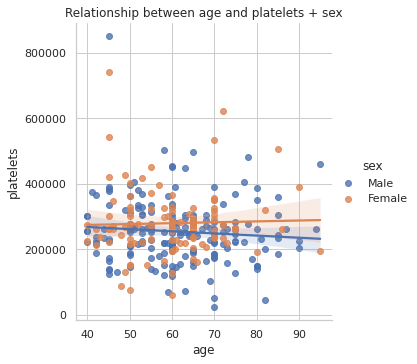

In [76]:
# 5. Relationship between age and platelets + sex
sns.lmplot(x = "age",
           y = "platelets",
           hue = "sex",
           data = df_eda).set(title='Relationship between age and platelets + sex')
plt.show()

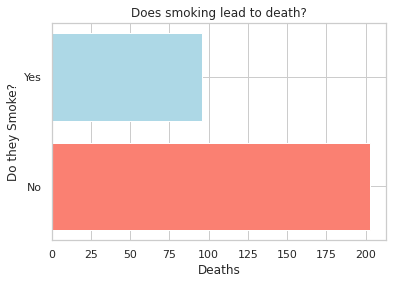

In [77]:
# 6. Smoking against Death
figure_4 = plt.barh(df_eda["smoking"].value_counts().index,df_eda["death_event"].value_counts(), color=["salmon", "lightblue"])
plt.title("Does smoking lead to death?")
plt.xlabel("Deaths")
plt.ylabel("Do they Smoke?")
plt.show()

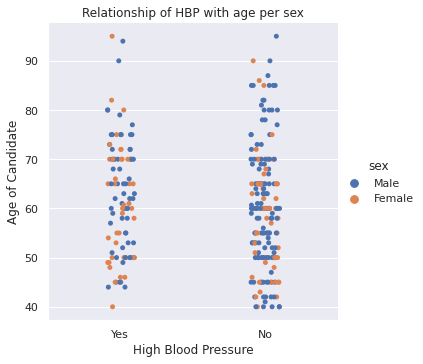

In [103]:
# 7. High blood pressure with age
sns.catplot(
    x = "high_blood_pressure",
    y = "age",
    hue = "sex",
    data = df_eda
).set(xlabel="High Blood Pressure", ylabel="Age of Candidate", title="Relationship of HBP with age per sex")
plt.show()

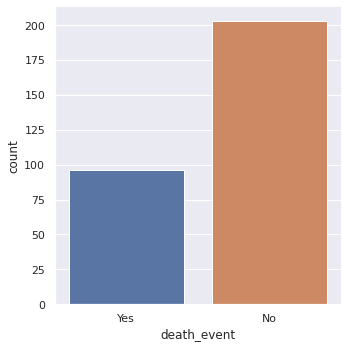

In [102]:
# 8. Value Count for the deaths
sns.catplot(x='death_event', 
            data=df_eda, 
            kind="count")
plt.show()